# Create stimuli spanning a parameter space

One of the strengths of `stimupy` is that its fully parameterized stimulus functions make it easy to create **stimulus parameter spaces** — or, more briefly, **stimspaces**.

A **stimspace** is a systematic variation of a stimulus across one or more parameter dimensions.  
This is useful for experiments, computational modeling, and visualizations where you want to explore how changing certain stimulus parameters affects a stimulus.


## Create a stimspace in `stimupy`

`stimupy` provides two main utility functions for building stimspaces:

- [`utils.permutate_params`](utils.permutate_params) — generates all possible parameter combinations as dictionaries.
- [`utils.create_stimspace_stimuli`](utils.create_stimspace_stimuli) — uses these combinations to generate actual stimulus images.

To define a stimspace, supply the parameters you want to vary as **lists**.  
A parameter with a single value should still be wrapped in a list for consistency.

---

## Example: 1D stimspace for Gabors

To generate a stimspace, we first need to know the relevant variables of the stimulus function we want to use. Here, let's explore stimspaces for [`Gabors`](stimuli.gabors.gabor).

In [1]:
from stimupy.stimuli.gabors import gabor

help(gabor)


Help on function gabor in module stimupy.stimuli.gabors:

gabor(
    visual_size=None,
    ppd=None,
    shape=None,
    frequency=None,
    n_bars=None,
    bar_width=None,
    period='ignore',
    rotation=0.0,
    phase_shift=0,
    intensities=(0.0, 1.0),
    origin='center',
    round_phase_width=False,
    sigma=None
)
    Draw a Gabor: a sinewave grating in a Gaussian envelope

    Parameters
    ----------
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of image, in degrees
    ppd : Sequence[Number, Number], Number, or None (default)
        pixels per degree [vertical, horizontal]
    shape : Sequence[Number, Number], Number, or None (default)
        shape [height, width] of image, in pixels
    frequency : Number, or None (default)
        spatial frequency of grating, in cycles per degree visual angle
    n_bars : Number, or None (default)
        number of bars in the grating
    bar_width : Number, or None (defaul

In this example, we vary the `frequency` parameter while keeping the other parameters constant.

In [2]:
from stimupy.utils import permutate_params

params = {
    "visual_size": [1.],      # Each parameter must be in a list []
    "ppd": [100],
    "sigma": [0.1],
    "frequency": [1, 2, 4],   # Varying frequency spans the stimspace
}

permuted_params = permutate_params(params=params)
permuted_params

[{'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 1},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 2},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 4}]

Now we generate and plot the stimuli for this **1D stimspace**:

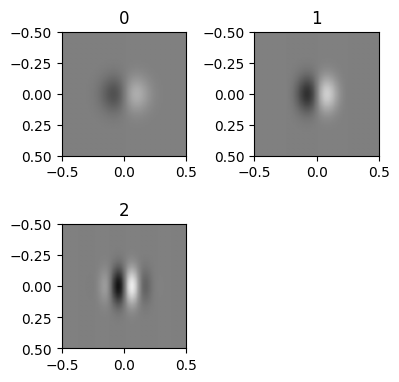

In [3]:
from stimupy.utils import create_stimspace_stimuli, plot_stimuli

space_1d = create_stimspace_stimuli(
    stimulus_function=gabor,
    permutations_dicts=permuted_params,
)

plot_stimuli(space_1d, units="deg")

## Example: 2D stimspace for Gabors

Before, we have only focused on a single stimulus parameter. However, you can vary as many stimulus parameters at once as you like.
In the next example, we vary both the frequency and the sigma of the Gabor to create a 2D stimspace.

In [4]:
params["sigma"] = [0.05, 0.1, 0.15]  # Now vary sigma as well

permuted_params_2d = permutate_params(params=params)
permuted_params_2d

[{'visual_size': 1.0, 'ppd': 100, 'sigma': 0.05, 'frequency': 1},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.05, 'frequency': 2},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.05, 'frequency': 4},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 1},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 2},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.1, 'frequency': 4},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.15, 'frequency': 1},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.15, 'frequency': 2},
 {'visual_size': 1.0, 'ppd': 100, 'sigma': 0.15, 'frequency': 4}]

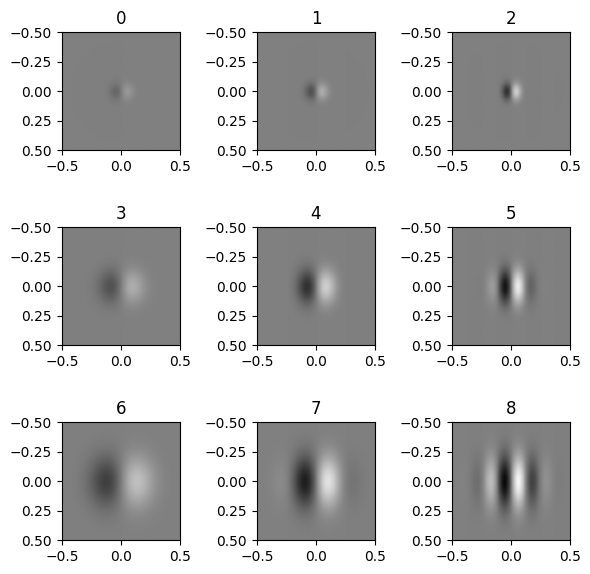

In [5]:
stimspace_2d = create_stimspace_stimuli(
    stimulus_function=gabor,
    permutations_dicts=permuted_params_2d,
)

plot_stimuli(stimspace_2d, units="deg")